In [275]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd


In [276]:
file_path = "C:/Users/YourName/Downloads/Vaccination_Coverage_among_Young_Children__0-35_Months__20241125.csv"


In [277]:


# Correct file path
file_path = "C:/Users/Kerry Lam/Downloads/Vaccination_Coverage_among_Young_Children__0-35_Months__20241125.csv"
vaccination_data = pd.read_csv(file_path)

# Inspect the dataset
print(vaccination_data.head())


  Vaccine      Dose      Geography Type     Geography Birth Year/Birth Cohort  \
0    DTaP  ≥3 Doses  States/Local Areas  North Dakota                    2019   
1    DTaP  ≥3 Doses  States/Local Areas  North Dakota                    2018   
2    DTaP  ≥3 Doses  States/Local Areas  North Dakota               2018-2019   
3   Polio  ≥3 Doses  States/Local Areas  North Dakota                    2021   
4   Polio  ≥2 Doses  States/Local Areas  North Dakota                    2021   

  Dimension Type  Dimension  Estimate (%)    95% CI (%)  Sample Size  
0            Age  19 Months          93.5  88.0 to 96.6        263.0  
1            Age  19 Months          95.2  91.0 to 97.5        293.0  
2            Age  19 Months          91.8  88.3 to 94.3        556.0  
3            Age  19 Months          89.4  81.9 to 94.1        143.0  
4            Age   5 Months          79.3  69.0 to 86.8        143.0  


In [278]:
df = pd.read_csv("Datasets/Vaccination_Coverage_among_Young_Children__0-35_Months__20241101.csv")

In [279]:
# Define the state-to-region mapping for the 9 census regions
state_to_region = {
    # Middle Atlantic
    'New York': 'Middle Atlantic', 'NY-Rest of state': 'Middle Atlantic', 'NY-City of New York': 'Middle Atlantic', 
    'New Jersey': 'Middle Atlantic', 'Pennsylvania': 'Middle Atlantic', 
    'PA-Philadelphia': 'Middle Atlantic', 'PA-Rest of state': 'Middle Atlantic',

    # New England
    'Vermont': 'New England', 'New Hampshire': 'New England', 'Massachusetts': 'New England', 
    'Connecticut': 'New England', 'Rhode Island': 'New England', 'Maine': 'New England',

    # East North Central
    'Indiana': 'East North Central', 'Illinois': 'East North Central', 'Michigan': 'East North Central', 
    'Ohio': 'East North Central', 'Wisconsin': 'East North Central', 
    'IL-City of Chicago': 'East North Central', 'IL-Rest of state': 'East North Central',

    # West North Central
    'Iowa': 'West North Central', 'Kansas': 'West North Central', 'Minnesota': 'West North Central',
    'Missouri': 'West North Central', 'Nebraska': 'West North Central', 
    'North Dakota': 'West North Central', 'South Dakota': 'West North Central',

    # South Atlantic
    'Delaware': 'South Atlantic', 'District of Columbia': 'South Atlantic', 'Florida': 'South Atlantic', 
    'Georgia': 'South Atlantic', 'Maryland': 'South Atlantic', 'North Carolina': 'South Atlantic', 
    'South Carolina': 'South Atlantic', 'Virginia': 'South Atlantic', 'West Virginia': 'South Atlantic',

    # East South Central
    'Alabama': 'East South Central', 'Kentucky': 'East South Central', 
    'Mississippi': 'East South Central', 'Tennessee': 'East South Central', 

    # West South Central
    'Arkansas': 'West South Central', 'Louisiana': 'West South Central', 'Oklahoma': 'West South Central', 
    'Texas': 'West South Central', 'TX-City of Houston': 'West South Central', 
    'TX-Rest of state': 'West South Central', 'TX-Dallas County': 'West South Central', 
    'TX-Bexar County': 'West South Central', 'TX-El Paso County': 'West South Central', 
    'TX-Hidalgo County': 'West South Central', 'TX-Tarrant County': 'West South Central',

    # Mountain
    'Arizona': 'Mountain', 'Colorado': 'Mountain', 'Idaho': 'Mountain', 
    'New Mexico': 'Mountain', 'Montana': 'Mountain', 'Utah': 'Mountain', 
    'Nevada': 'Mountain', 'Wyoming': 'Mountain',

    # Pacific
    'Alaska': 'Pacific', 'California': 'Pacific', 'Hawaii': 'Pacific', 
    'Oregon': 'Pacific', 'Washington': 'Pacific'
}


In [280]:
df = df[df['Vaccine'] == 'DTaP']



unique_vaccines = df['Vaccine'].unique()
print("Unique values in 'Vaccine' column after filtering:", unique_vaccines)

Unique values in 'Vaccine' column after filtering: ['DTaP']


In [281]:
# Filter for 2020-2021 Birth Cohort
df = df[df['Birth Year/Birth Cohort'].str.contains('2020|2021', na=False)]

# Filter to include only rows where 'Dimension Type' is 'Age'
df_filtered = df[df['Dimension Type'] == 'Age']

# Map Census Region and handle any unmapped entries as 'Unknown'
df_filtered['Census Region'] = df_filtered['Geography'].map(state_to_region).fillna('Unknown')

# Filter out rows with 'Unknown' regions if they exist
df_filtered = df_filtered[df_filtered['Census Region'] != 'Unknown']

# Extract the age in months from the 'Dimension' column
df_filtered['Age Milestone (months)'] = df_filtered['Dimension'].str.extract(r'(\d+)').astype(float)

# Drop any rows with missing values in relevant columns
df_filtered = df_filtered.dropna(subset=['Age Milestone (months)', 'Census Region', 'Estimate (%)'])

# Convert Estimate (%) to numeric if not already
df_filtered['Estimate (%)'] = pd.to_numeric(df_filtered['Estimate (%)'], errors='coerce')
df_filtered = df_filtered.dropna(subset=['Estimate (%)'])



In [282]:
# Calculate mean uptake by region
regional_means = df_filtered.groupby('Census Region')['Estimate (%)'].mean().reset_index()

# Rename columns for clarity
regional_means.columns = ['Region', 'Mean_Dtap_Uptake']

# Display the results
print(regional_means)


               Region  Mean_Dtap_Uptake
0  East North Central         84.339643
1  East South Central         83.535000
2     Middle Atlantic         83.825000
3            Mountain         82.799688
4         New England         90.451667
5             Pacific         82.335500
6      South Atlantic         84.520833
7  West North Central         84.985714
8  West South Central         82.726429


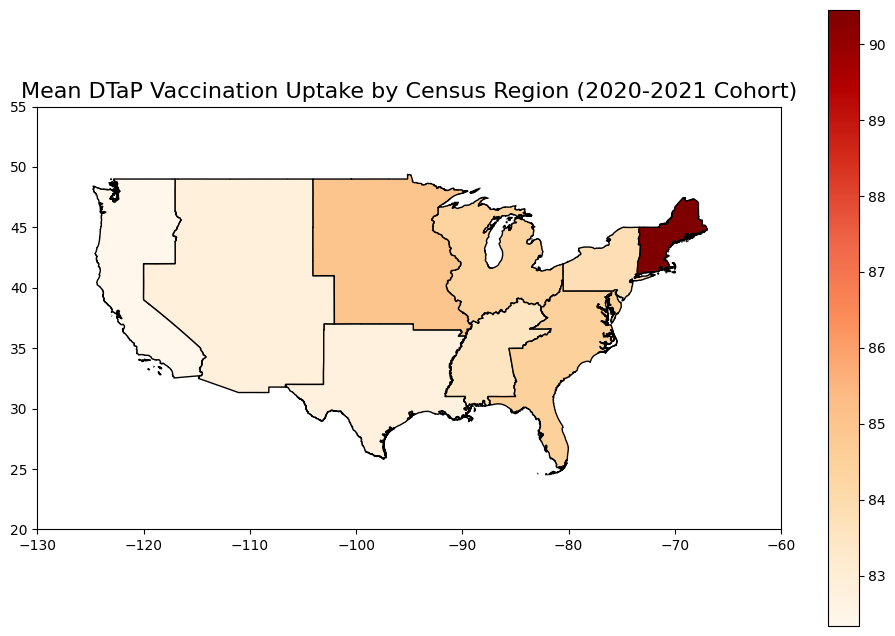

In [283]:


# Plot the visualization
fig, ax = plt.subplots(figsize=(12, 8))
plt.title(
    "Mean DTaP Vaccination Uptake by Census Region (2020-2021 Cohort)",
    fontsize=16,
)

# Plot the data with black outlines
merged.plot(
    column="Mean_Dtap_Uptake",  # Your column for visualization
    cmap="OrRd",               # Colormap for shading
    legend=True,               # Add legend for color scale
    ax=ax,                     # Use the same axis
    edgecolor="black"          # Set outline color to black
)

# Set bounds for the contiguous U.S.
ax.set_xlim([-130, -60])  # Longitude for contiguous U.S.
ax.set_ylim([20, 55])     # Latitude for contiguous U.S.

# Show the map
plt.show()


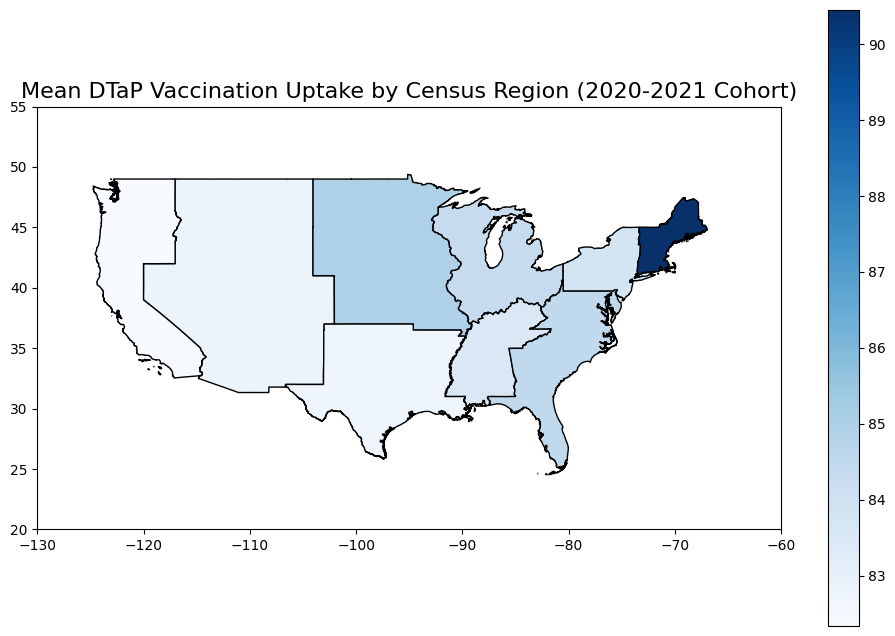

In [ ]:


# Plot the visualization
fig, ax = plt.subplots(figsize=(12, 8))
plt.title(
    "Mean DTaP Vaccination Uptake by Census Region (2020-2021 Cohort)",
    fontsize=16,
)

# Plot the data with black outlines
merged.plot(
    column="Mean_Dtap_Uptake",  # Your column for visualization
    cmap="Blues",               # Colormap for shading
    legend=True,               # Add legend for color scale
    ax=ax,                     # Use the same axis
    edgecolor="black"          # Set outline color to black
)

# Set bounds for the contiguous U.S.
ax.set_xlim([-130, -60])  # Longitude for contiguous U.S.
ax.set_ylim([20, 55])     # Latitude for contiguous U.S.

# Show the map
plt.show()
